In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45


In [4]:
confirmed_cases['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Diamond Princess', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India

In [5]:
death_cases =pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [6]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,85,90,95,104,106,109,115,120,122,127
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,463,465,470,476,483,488,494,502,507,515
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,45,45,46,46,47,47,48,48,48,48
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
recovered_cases =pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [8]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,345,397,421,458,468,472,502,558,558,610
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,531,543,570,595,605,620,627,650,654,682
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1936,1998,2067,2197,2323,2467,2546,2678,2841,2998
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,493,499,514,521,526,537,545,550,550,568
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,11,11,11,11,11,11,13,13,13,13


In [9]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-05-2020.csv')

In [10]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-06 02:32:31,34.223334,-82.461707,33,0,0,33,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-06 02:32:31,30.295065,-92.414197,136,10,0,126,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-06 02:32:31,37.767072,-75.632346,429,7,0,422,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-06 02:32:31,43.452658,-116.241552,713,19,0,694,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-06 02:32:31,41.330756,-94.471059,2,0,0,2,"Adair, Iowa, US"


In [11]:
cols = confirmed_cases.columns
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20',
       '5/10/20', '5/11/20', '5/12/20'],
      dtype='object', length=116)

In [12]:
# extracting the date columns
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = death_cases.loc[:, cols[4]:cols[-1]]
recovered = recovered_cases.loc[:, cols[4]:cols[-1]]

In [13]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,0,0,0,0,0,0,0,0,0,0,...,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,0,0,0,0,0,0,0,0,0,0,...,795,803,820,832,842,850,856,868,872,876
2,0,0,0,0,0,0,0,0,0,0,...,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,0,0,0,0,0,0,0,0,0,0,...,748,750,751,751,752,752,754,755,755,758
4,0,0,0,0,0,0,0,0,0,0,...,35,35,36,36,36,43,43,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,16,23,174,174,187,208,208,208,208,208
263,0,0,0,0,0,0,0,0,0,0,...,10,12,22,25,25,34,34,51,56,65
264,0,0,0,0,0,0,0,0,0,0,...,3,3,3,8,8,8,11,11,11,11


In [14]:
dates = confirmed.columns


In [15]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20',
       '5/10/20', '5/11/20', '5/12/20'],
      dtype='object', length=112)

In [85]:
dates.shape

(112,)

In [16]:
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []


china_cases = []
Italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
India_cases =[]

china_deaths = []
Italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
India_deaths = []


china_recoveries = []
Italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
russia_recoveries = []
India_recoveries =[]

In [17]:
for i in dates :
  confirmed_sum = confirmed[i].sum()
  death_sum = deaths[i].sum()
  recovered_sum = recovered[i].sum()

  world_cases.append(confirmed_sum)
  total_deaths.append(death_sum)
  total_recovered.append(recovered_sum)
  total_active.append(confirmed_sum-death_sum-recovered_sum)

  mortality_rate.append(death_sum/confirmed_sum)
  recovery_rate.append(recovered_sum/confirmed_sum)

  china_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='China'][i].sum())
  Italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Italy'][i].sum())
  us_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='US'][i].sum())
  spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Spain'][i].sum())
  france_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='France'][i].sum())
  germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Germany'][i].sum())
  uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='United Kingdom'][i].sum())
  russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='Russia'][i].sum())
  India_cases.append(confirmed_cases[confirmed_cases['Country/Region']=='India'][i].sum())

  china_deaths.append(death_cases[death_cases['Country/Region']=='China'][i].sum())
  Italy_deaths.append(death_cases[death_cases['Country/Region']=='Italy'][i].sum())
  us_deaths.append(death_cases[death_cases['Country/Region']=='US'][i].sum())
  spain_deaths.append(death_cases[death_cases['Country/Region']=='Spain'][i].sum())
  france_deaths.append(death_cases[death_cases['Country/Region']=='France'][i].sum())
  germany_deaths.append(death_cases[death_cases['Country/Region']=='Germany'][i].sum())
  uk_deaths.append(death_cases[death_cases['Country/Region']=='United Kingdom'][i].sum())
  russia_deaths.append(death_cases[death_cases['Country/Region']=='Russia'][i].sum())
  India_deaths.append(death_cases[death_cases['Country/Region']=='India'][i].sum())

  china_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='China'][i].sum())
  Italy_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Italy'][i].sum())
  us_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='US'][i].sum())
  spain_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Spain'][i].sum())
  france_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='France'][i].sum())
  germany_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Germany'][i].sum())
  uk_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='United Kingdom'][i].sum())
  russia_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='Russia'][i].sum())
  India_recoveries.append(recovered_cases[recovered_cases['Country/Region']=='India'][i].sum())






In [18]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145223,
 156118,
 167470,
 181624,
 197134,
 214875,
 242631,
 272263,
 304580,
 337018,
 378282,
 418106,
 467751,
 529722,
 593459,
 660853,
 720290,
 782500,
 857608,
 932650,
 1013477,
 1095893,
 1176059,
 1249743,
 1321436,
 1396438,
 1480232,
 1565555,
 1657950,
 1736032,
 1835145,
 1905160,
 1975566,
 2055424,
 2151792,
 2239634,
 2317243,
 2400787,
 2471727,
 2549046,
 2624608,
 2708403,
 2795731,
 2881140,
 2955033,
 3023722,
 3097229,
 3172287,
 3256910,
 3345558,
 3427584,
 3506729,
 3583055,
 3662691,
 3756069,
 3845718,
 3938064,
 4024009,
 4101699,
 4177502,
 4261747]

In [19]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4614,
 4722,
 5408,
 5830,
 6472,
 7150,
 7956,
 8823,
 9946,
 11422,
 13125,
 14825,
 16759,
 19014,
 21785,
 24788,
 28288,
 31798,
 35323,
 39439,
 44238,
 49675,
 55817,
 61812,
 67981,
 73077,
 78767,
 86662,
 93354,
 100882,
 108113,
 114146,
 119853,
 125561,
 132439,
 140659,
 147946,
 156804,
 163214,
 167772,
 173097,
 180236,
 186912,
 193665,
 199997,
 206187,
 209900,
 214444,
 220801,
 227665,
 233360,
 238619,
 243813,
 247470,
 251537,
 257239,
 263855,
 269567,
 274898,
 279311,
 282709,
 286330,
 291942]

In [20]:
confirmed_sum

4261747

In [21]:
death_sum

291942

In [22]:
recovered_sum

1493414

In [23]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 7,
 8,
 8,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 15,
 15,
 15,
 51,
 51,
 57,
 58,
 60,
 68,
 74,
 98,
 118,
 149,
 217,
 262,
 402,
 518,
 583,
 959,
 1281,
 1663,
 2179,
 2727,
 3499,
 4632,
 6421,
 7783,
 13747,
 19273,
 25600,
 33276,
 43843,
 53736,
 65778,
 83836,
 101657,
 121465,
 140909,
 161831,
 188172,
 213242,
 243622,
 275367,
 308650,
 336802,
 366317,
 397121,
 428654,
 462780,
 496535,
 526396,
 555313,
 580619,
 607670,
 636350,
 667592,
 699706,
 732197,
 758809,
 784326,
 811865,
 840351,
 869170,
 905358,
 938154,
 965785,
 988197,
 1012582,
 1039909,
 1069424,
 1103461,
 1132539,
 1158040,
 1180375,
 1204351,
 1229331,
 1257023,
 1283929,
 1309550,
 1329260,
 1347881,
 1369376]

In [24]:
India_cases

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 5,
 28,
 30,
 31,
 34,
 39,
 43,
 56,
 62,
 73,
 82,
 102,
 113,
 119,
 142,
 156,
 194,
 244,
 330,
 396,
 499,
 536,
 657,
 727,
 887,
 987,
 1024,
 1251,
 1397,
 1998,
 2543,
 2567,
 3082,
 3588,
 4778,
 5311,
 5916,
 6725,
 7598,
 8446,
 9205,
 10453,
 11487,
 12322,
 13430,
 14352,
 15722,
 17615,
 18539,
 20080,
 21370,
 23077,
 24530,
 26283,
 27890,
 29451,
 31324,
 33062,
 34863,
 37257,
 39699,
 42505,
 46437,
 49400,
 52987,
 56351,
 59695,
 62808,
 67161,
 70768,
 74292]

In [25]:
Italy_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 3,
 45,
 46,
 46,
 83,
 149,
 160,
 276,
 414,
 523,
 589,
 622,
 724,
 724,
 1045,
 1045,
 1439,
 1966,
 2335,
 2749,
 2941,
 4025,
 4440,
 4440,
 6072,
 7024,
 7024,
 8326,
 9362,
 10361,
 10950,
 12384,
 13030,
 14620,
 15729,
 16847,
 18278,
 19758,
 20996,
 21815,
 22837,
 24392,
 26491,
 28470,
 30455,
 32534,
 34211,
 35435,
 37130,
 38092,
 40164,
 42727,
 44927,
 47055,
 48877,
 51600,
 54543,
 57576,
 60498,
 63120,
 64928,
 66624,
 68941,
 71252,
 75945,
 78249,
 79914,
 81654,
 82879,
 85231,
 93245,
 96276,
 99023,
 103031,
 105186,
 106587,
 109039]

In [26]:
def daily_increase(data):

  d = []
  for i in range(len(data)):
    if i == 0:
      d.append(data[0])
    else:
      d.append(data[i]-data[i-1])
  return d 

    


In [27]:
# confirmed cases

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(Italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
india_daily_increase = daily_increase(India_cases)


In [89]:
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2280,
 2766,
 3915,
 4046,
 3974,
 3769,
 5030,
 7255,
 2477,
 16871,
 10895,
 11352,
 14154,
 15510,
 17741,
 27756,
 29632,
 32317,
 32438,
 41264,
 39824,
 49645,
 61971,
 63737,
 67394,
 59437,
 62210,
 75108,
 75042,
 80827,
 82416,
 80166,
 73684,
 71693,
 75002,
 83794,
 85323,
 92395,
 78082,
 99113,
 70015,
 70406,
 79858,
 96368,
 87842,
 77609,
 83544,
 70940,
 77319,
 75562,
 83795,
 87328,
 85409,
 73893,
 68689,
 73507,
 75058,
 84623,
 88648,
 82026,
 79145,
 76326,
 79636,
 93378,
 89649,
 92346,
 85945,
 77690,
 75803,
 84245]

In [29]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524]

In [30]:
spain_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 7,
 2,
 17,
 13,
 39,
 36,
 45,
 57,
 37,
 141,
 100,
 173,
 400,
 622,
 582,
 0,
 2955,
 1159,
 1407,
 2144,
 1806,
 2162,
 4053,
 2447,
 4964,
 3394,
 6368,
 4749,
 9630,
 8271,
 7933,
 7516,
 6875,
 7846,
 7967,
 8195,
 7947,
 7134,
 6969,
 5478,
 5029,
 5267,
 6278,
 5002,
 5051,
 4754,
 3804,
 3268,
 2442,
 5103,
 7304,
 5891,
 887,
 6948,
 1536,
 3968,
 4211,
 4635,
 -10034,
 2915,
 1729,
 1831,
 1308,
 2144,
 518,
 1781,
 1366,
 884,
 545,
 1318,
 996,
 1122,
 1410,
 721,
 772,
 3086,
 594]

In [31]:
germany_daily_increase

[0,
 0,
 0,
 0,
 0,
 1,
 3,
 0,
 0,
 1,
 3,
 2,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 10,
 19,
 2,
 31,
 51,
 29,
 37,
 66,
 220,
 188,
 129,
 241,
 136,
 281,
 451,
 170,
 1597,
 910,
 1210,
 1477,
 1985,
 3070,
 2993,
 4528,
 2365,
 2660,
 4183,
 3930,
 4337,
 6615,
 6933,
 6824,
 4400,
 4790,
 4923,
 6064,
 6922,
 6365,
 4933,
 4031,
 3251,
 4289,
 5633,
 4885,
 3990,
 2737,
 2946,
 2218,
 1287,
 3394,
 2945,
 3699,
 1945,
 1842,
 1881,
 1226,
 2357,
 2481,
 1870,
 1514,
 1257,
 988,
 1154,
 1627,
 1470,
 1068,
 890,
 697,
 488,
 855,
 1155,
 1268,
 1158,
 736,
 555,
 697,
 595]

In [32]:
#deaths
world_daily_deaths = daily_increase(total_deaths)
china_daily_deaths = daily_increase(china_deaths)
italy_daily_deaths = daily_increase(Italy_deaths)
us_daily_deaths = daily_increase(us_deaths)
spain_daily_deaths = daily_increase(spain_deaths)
france_daily_deaths = daily_increase(france_deaths)
germany_daily_deaths = daily_increase(germany_deaths)
uk_daily_deaths = daily_increase(uk_deaths)
india_daily_deaths = daily_increase(India_deaths)


In [33]:
india_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121]

In [34]:
#recoveries
world_daily_recoveries = daily_increase(total_recovered)
china_daily_recoveries = daily_increase(china_recoveries)
italy_daily_recoveries = daily_increase(Italy_recoveries)
us_daily_recoveries = daily_increase(us_recoveries)
spain_daily_recoveries = daily_increase(spain_recoveries)
france_daily_recoveries = daily_increase(france_recoveries)
germany_daily_recoveries = daily_increase(germany_recoveries)
uk_daily_recoveries = daily_increase(uk_recoveries)
india_daily_recoveries = daily_increase(India_recoveries)

In [35]:
india_daily_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871]

In [36]:
unique_countries = list(latest_data['Country_Region'].unique())

In [37]:
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Australia',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala

In [38]:
country_confirmed_cases = []
country_death_cases = []
country_active_case = []
country_recovered_cases = []
country_mortality_rate = []

no_cases = []
for i in unique_countries:
  cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
  if cases > 0:
    country_confirmed_cases.append(cases)
  else:
    no_cases.append(i)



for i in no_cases:
  unique_countries.remove(i)


#sort countries by the number of confirmed cases

unique_countries =  [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key = operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
  country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
  country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
  country_recovered_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
  country_active_case.append(country_confirmed_cases[i]-country_death_cases[i]-country_recovered_cases[i])
  country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])


In [39]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of confirmed cases' : country_confirmed_cases, 'Number of Deaths' : country_death_cases, 'Number of Recoveries' : country_recovered_cases, 'Number of Active Cases' : country_active_case,  'Mortality rate' : country_mortality_rate})

# number of cases per Country/Region

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of confirmed cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality rate
0,US,1204351,71064,189791,943496,0.0590061
1,Spain,219329,25613,123486,70230,0.116779
2,Italy,213013,29315,85231,98467,0.137621
3,United Kingdom,196243,29501,926,165816,0.150329
4,France,170687,25537,52842,92308,0.149613
5,Germany,167007,6993,135100,24914,0.0418725
6,Russia,155370,1451,19865,134054,0.009339
7,Turkey,129491,3520,73285,52686,0.0271834
8,Brazil,115455,7938,48221,59296,0.0687541
9,Iran,99970,6340,80475,13155,0.063419


In [40]:
unique_provinces = list(latest_data['Province_State'].unique())

In [41]:
province_confirmed_cases = []
province_death_cases = []
province_active_case = []
province_recovered_cases = []
province_mortality_rate = []

no_cases = []
for i in unique_provinces:
  cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
  if cases > 0:
    province_confirmed_cases.append(cases)
  else:
    no_cases.append(i)



for i in no_cases:
  unique_provinces.remove(i)


#sort countries by the number of confirmed cases

unique_provinces =  [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key = operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
  province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
  province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
  province_recovered_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
  province_active_case.append(province_confirmed_cases[i]-province_death_cases[i]-province_recovered_cases[i])
  province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [42]:
province_df = pd.DataFrame({'Province/State Name': unique_provinces, 'Number of confirmed cases' : province_confirmed_cases, 'Number of Deaths' : province_death_cases, 'Number of Recoveries' : province_recovered_cases, 'Number of Active Cases' : province_active_case,  'Mortality rate' : province_mortality_rate})

# number of cases per Province/State

province_df.style.background_gradient(cmap='Reds')

,Province/State Name,Number of confirmed cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality rate
0,New York,321192,25124,0,296068,0.0782211
1,New Jersey,130593,8244,0,122349,0.0631274
2,Massachusetts,70271,4212,0,66059,0.0599394
3,Hubei,68128,4512,63616,0,0.0662283
4,Illinois,65889,2834,0,63055,0.0430117
5,California,58456,2381,0,56075,0.0407315
6,Pennsylvania,53864,3179,0,50685,0.059019
7,Michigan,44451,4183,0,40268,0.0941036
8,Florida,37439,1471,0,35968,0.0392906
9,Texas,33912,925,0,32987,0.0272765


In [43]:
#Dealing with missing values

nan_indices = []

# handle nan if there is any, it is usually a float float('nan')

for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)


unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
  unique_provinces.pop(i)
  province_confirmed_cases.pop(i)



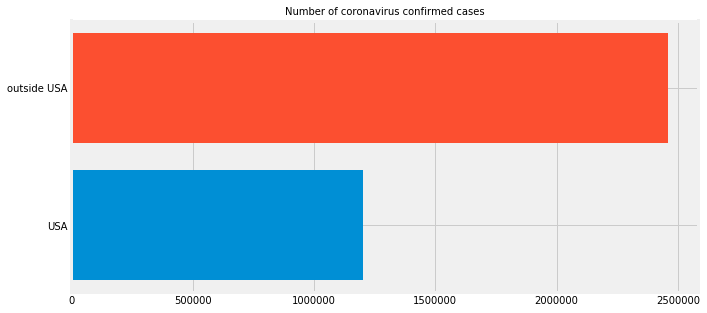

In [44]:
USA_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_USA_confirmed = np.sum(country_confirmed_cases)-USA_confirmed
plt.figure(figsize=(10,5))
plt.barh('USA', USA_confirmed)
plt.barh('outside USA', outside_USA_confirmed)
plt.title('Number of coronavirus confirmed cases', size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()


In [45]:
print('outside USA {} confirmed'.format(outside_USA_confirmed))
print('USA {} confirmed'.format(USA_confirmed))
print('Total {} confirmed'.format(USA_confirmed+outside_USA_confirmed))

outside USA 2458340 confirmed
USA 1204351 confirmed
Total 3662691 confirmed


In [46]:
# only show 10 countries with the most confirmed cases, rest show in others catagory

visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[:10])

for i in range(len(country_confirmed_cases[:10])):
  visual_unique_countries.append(unique_countries[i])
  visual_confirmed_cases.append(country_confirmed_cases[i])


visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)



In [47]:
def plot_barh_graphs(x,y,title):
  plt.figure(figsize=(10,5))
  plt.barh(x,y)
  plt.title(title, size=10)
  plt.xticks(size=10)
  plt.yticks(size=10)
  plt.show()

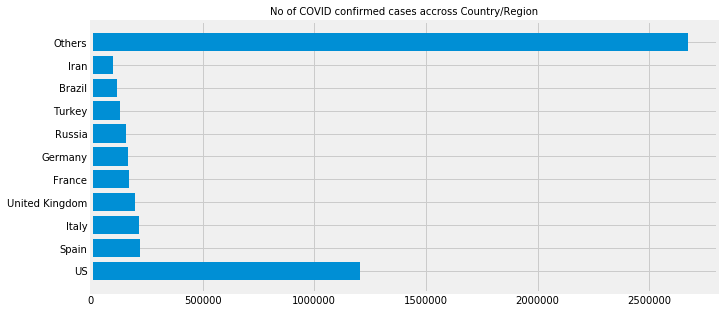

In [48]:
plot_barh_graphs(visual_unique_countries,visual_confirmed_cases,'No of COVID confirmed cases accross Country/Region')

In [49]:
def plot_pie_charts(x,y,title):
  c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
  plt.figure(figsize = (20,15))
  plt.title(title,size=20)
  plt.pie(y,colors=c)
  plt.legend(x, loc='best',fontsize = 15)
  plt.show()


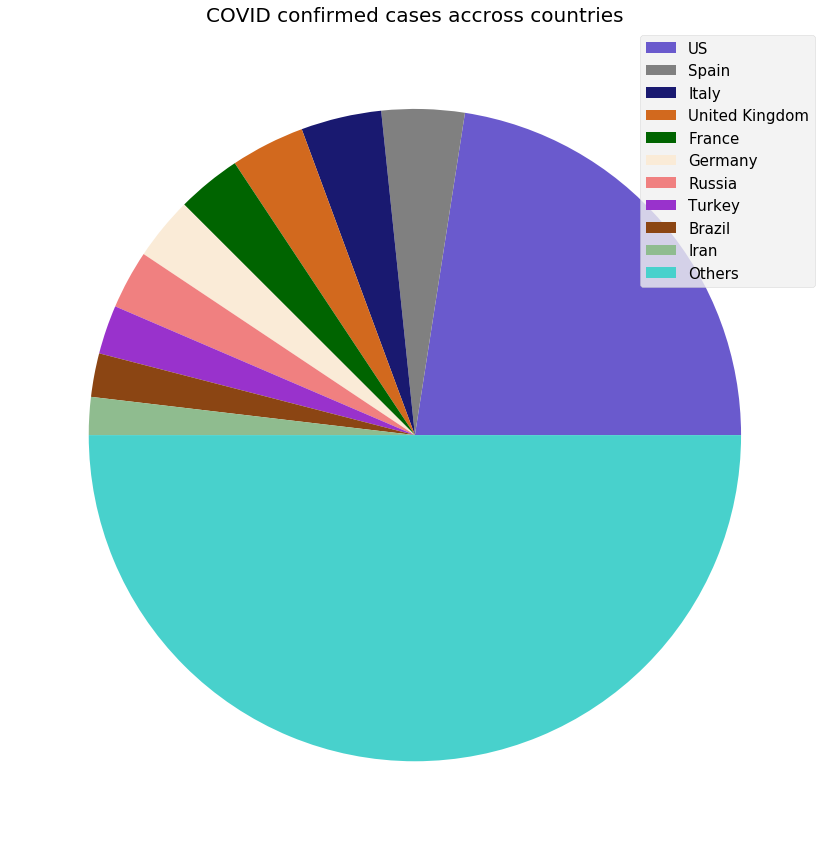

In [50]:
plot_pie_charts(visual_unique_countries,visual_confirmed_cases,'COVID confirmed cases accross countries')

In [51]:
# only show 10 provinces with the most confirmed cases, rest show in others catagory

visual_unique_provinces = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[:10])

for i in range(len(province_confirmed_cases[:10])):
  visual_unique_provinces.append(unique_provinces[i])
  visual_confirmed_cases2.append(province_confirmed_cases[i])


visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)


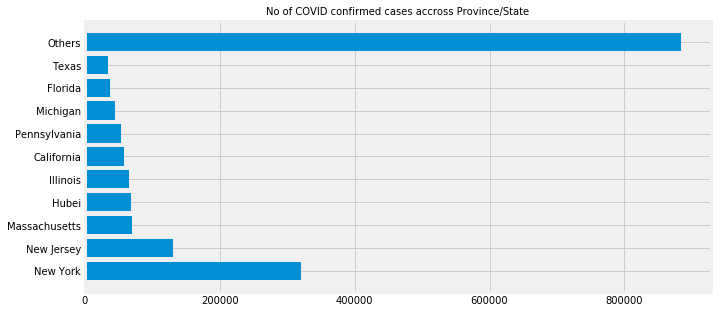

In [52]:
plot_barh_graphs(visual_unique_provinces,visual_confirmed_cases2,'No of COVID confirmed cases accross Province/State')

In [53]:
def plot_pie_charts2(x,y,title):
  c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_provinces))
  plt.figure(figsize = (20,15))
  plt.title(title,size=20)
  plt.pie(y,colors=c)
  plt.legend(x, loc='best',fontsize = 15)
  plt.show()

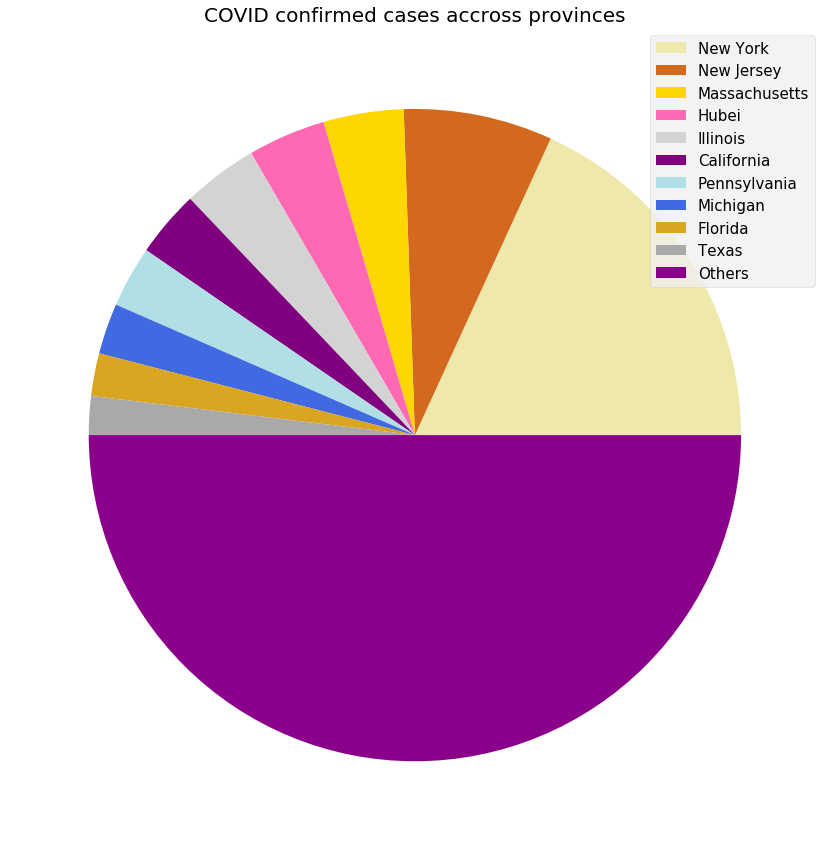

In [54]:
plot_pie_charts2(visual_unique_provinces,visual_confirmed_cases2,'COVID confirmed cases accross provinces')

In [55]:
def plot_pie_country_with_region(country_name,title):
  regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
  confirmed_cases = []
  no_cases = []

  for i in regions:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases >0 :
      confirmed_cases.append(cases)
    else:
      no_cases.append(i)

  # remove areas with no confirmed cases

  for i in no_cases:
    regions.remove(i)

  # only show the top ten states

  regions =  [k for k, v in sorted(zip(regions, confirmed_cases), key = operator.itemgetter(1), reverse=True)]

  for i in range(len(regions)):
    confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()

  # additional provincd/state will be considered 'others'

  if(len(regions)>10):

    regions_10 = regions[:10]
    regions_10.append('Others')
    confirmed_cases_10 = confirmed_cases[:10]
    confirmed_cases_10.append(np.sum(confirmed_cases[10:]))
    plot_pie_charts(regions_10,confirmed_cases_10,title)

  else:

    plot_pie_charts(regions,confirmed_cases,title)

  

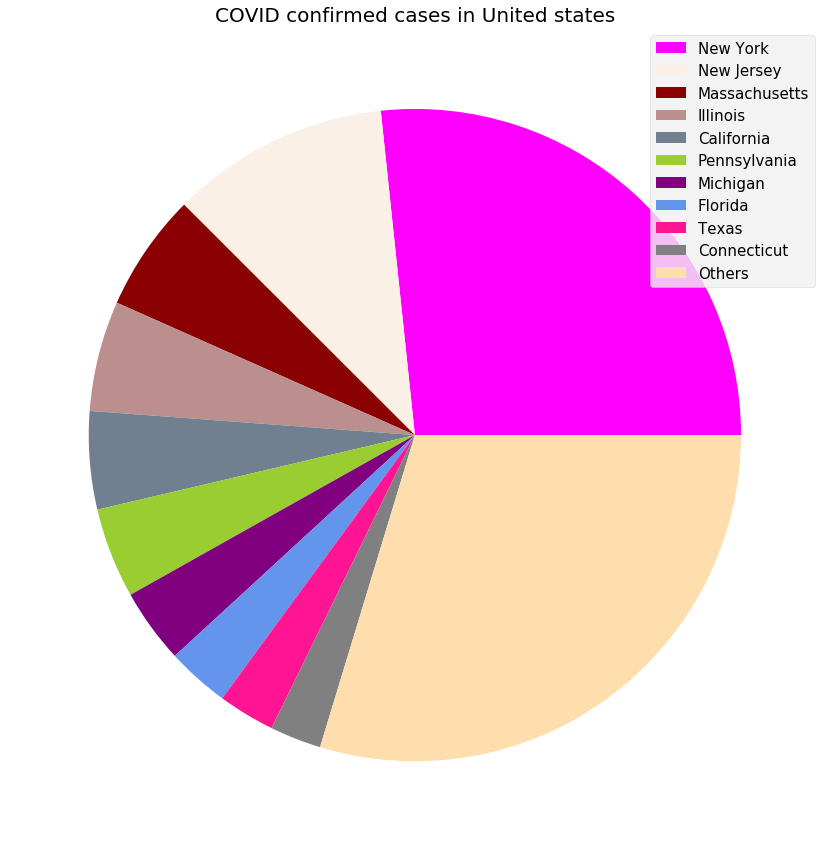

In [56]:
plot_pie_country_with_region('US','COVID confirmed cases in United states')

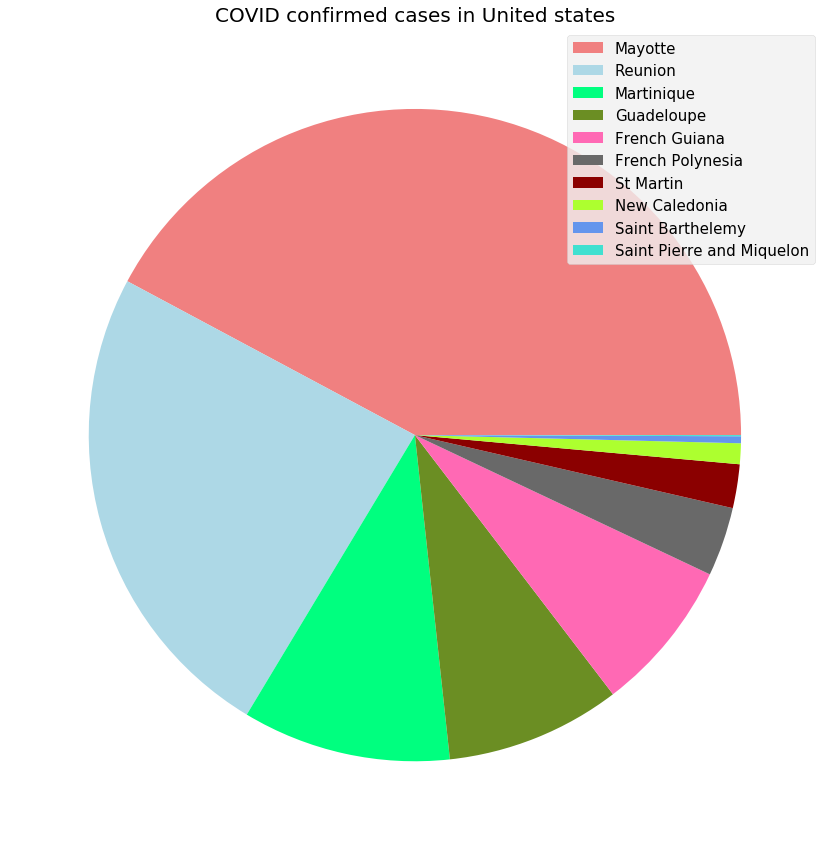

In [57]:
plot_pie_country_with_region('France','COVID confirmed cases in United states')

In [58]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)


In [59]:
days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [60]:
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [61]:
days_in_future = 20
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)

In [62]:
future_forcast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [63]:
adjusted_dates = future_forcast[:-20]

In [64]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [65]:
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20',
       '5/10/20', '5/11/20', '5/12/20'],
      dtype='object', length=112)

In [66]:
start = '1/22/20'
start_date = datetime.datetime.strptime(start, '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
  future_forcast_dates.append((start_date+datetime.timedelta(days=i)).strftime('%m/%d/%y'))



In [67]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size = 0.25, shuffle = False)

In [68]:
# transform our data for polynomial regression

poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forcast)

In [69]:
# polynomial regression

linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:', mean_squared_error(test_linear_pred,y_test_confirmed))

MAE: 1162248.1471730296
MSE: 2025237420497.7852


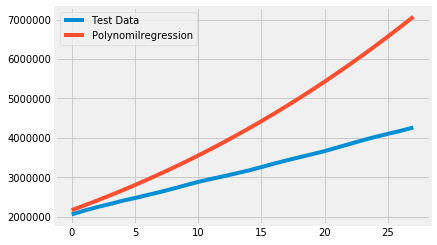

In [70]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomilregression'])


In [71]:
#svm_confirmed = svm_search.best_estimator_

svm_confirmed = SVR(shrinking = True, kernel = 'poly', gamma = 0.01, epsilon = 1, degree = 5, C =0.1)


In [72]:
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


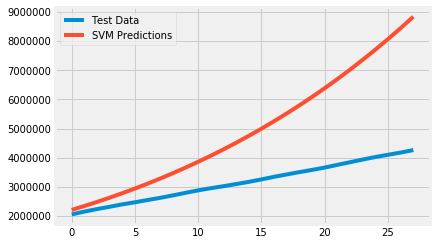

In [73]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])


In [74]:
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:', mean_squared_error(svm_test_pred,y_test_confirmed))

MAE: 1794515.1209045388
MSE: 4994560879550.659


In [76]:
adjusted_dates.reshape(1,-1)[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111])

In [77]:
adjusted_dates.shape

(112, 1)

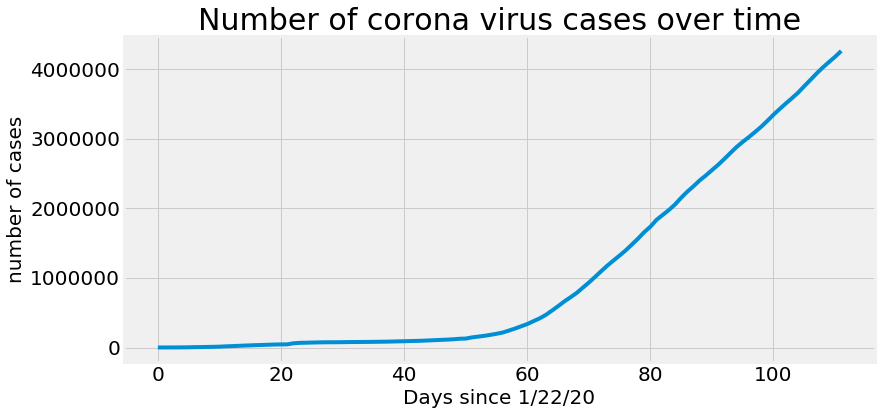

In [79]:

plt.figure(figsize=(12,6))
plt.plot(adjusted_dates,world_cases)
plt.title('Number of corona virus cases over time', size = 30)
plt.xlabel('Days since 1/22/20', size = 20)
plt.ylabel('number of cases', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

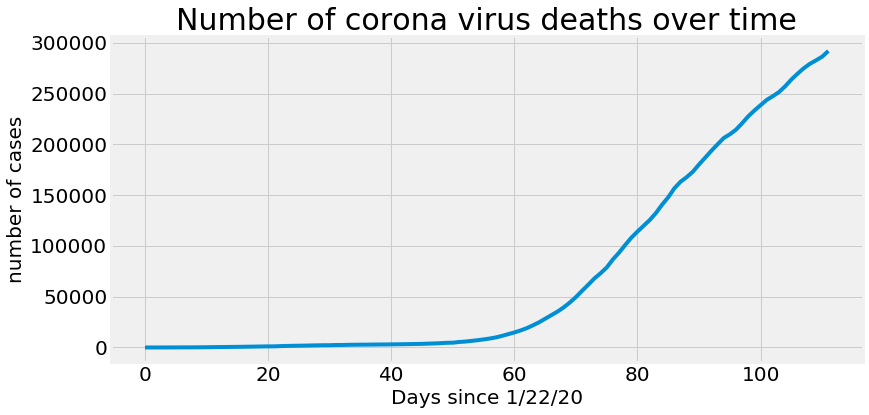

In [82]:
plt.figure(figsize=(12,6))
plt.plot(adjusted_dates,total_deaths)
plt.title('Number of corona virus deaths over time', size = 30)
plt.xlabel('Days since 1/22/20', size = 20)
plt.ylabel('number of cases', size=20)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.show()

In [83]:
death_cases.shape

(266, 116)

In [84]:
total_deaths.shape

(112, 1)

In [93]:
def plot_predictions(x,y,pred,algo_name,color):
    plt.figure(figsize=(12,6))
    plt.plot(x,y)
    plt.plot(future_forcast,pred,linestyle = 'dashed', color=color)
    plt.title('Number of corona virus cases over time', size = 30)
    plt.xlabel('Days since 1/22/20', size = 20)
    plt.ylabel('number of cases', size=20)
    plt.legend(['confirmed_Cases',algo_name], prop={'size':20})
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.show()

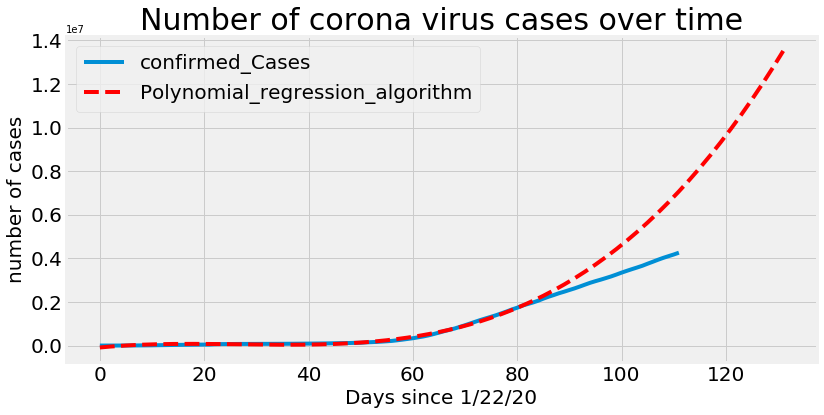

In [94]:
plot_predictions(adjusted_dates,world_cases,linear_pred,'Polynomial_regression_algorithm','red')

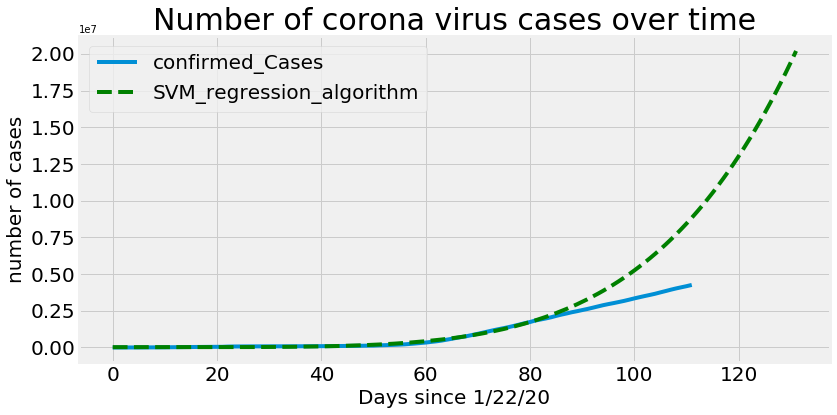

In [95]:
plot_predictions(adjusted_dates,world_cases,svm_pred,'SVM_regression_algorithm','green')